# Test the general Matern kernel

https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function#Simplification_for_specific_values_of_%CE%BD

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kv.html

In [1]:
from scipy.special import kv as K_nu
from scipy.special import gamma

import numpy as np
import matplotlib.pyplot as plt
from oceanoi.cov import matern52, matern32

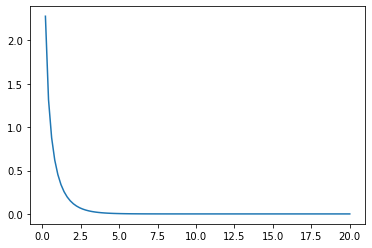

In [2]:
x = np.linspace(0,20,100)

plt.figure()
plt.plot(x, K_nu(0.5, x))

In [3]:
def matern_general_1d(x, xpr, params):
    eta, nu, l = params
    dx = np.sqrt((x-xpr)*(x-xpr))
    return matern_general(dx, eta, nu, l)

def matern_general(dx, eta, nu, l):
    
    cff1 = np.sqrt(2*nu)*dx/l
    K = np.power(eta, 2.) * np.power(2., 1-nu) / gamma(nu)
    K *= np.power(cff1, nu)
    K *= K_nu(nu,cff1)
    
    K[np.isnan(K)] = np.power(eta, 2.)
    
    return K

def matern_spectra(f, eta, nu, l, n=1):
    
    S = np.power(eta,2.) * np.power(2.,n) * np.power(np.pi, 0.5*n) 
    S *= gamma(nu+0.5*n) * np.power(2*nu, nu)
    
    cff1 = gamma(nu)*np.power(l, 2*nu)
    cff2 = 2*nu/l**2 + 4*np.pi**2*f**2
    
    S /= cff1
    S *= np.power(cff2, -(nu+0.5*n))
    
    return S


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


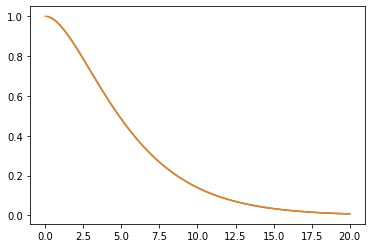

In [60]:
l=5
plt.figure()
plt.plot(x, matern_general(x, 1, 1.5, l))
plt.plot(x, matern32(0, x, l))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


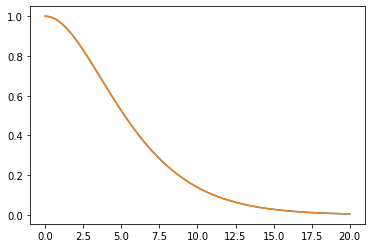

In [66]:
plt.figure()
plt.plot(x, matern_general(x, 1, 2.5, l))
plt.plot(x, matern52(0, x, l))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


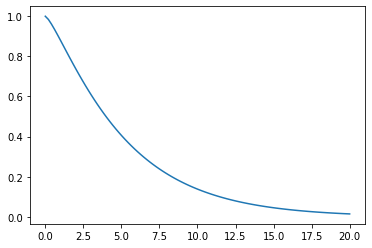

In [67]:
plt.figure()
plt.plot(x, matern_general(x, 1, 0.7, l))

In [68]:
matern_general(x, 1, 0.7, l)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


array([1.        , 0.98422442, 0.96091863, 0.93464105, 0.90682409,
       0.87822719, 0.84932   , 0.82041641, 0.79173583, 0.76343561,
       0.73563016, 0.70840298, 0.68181463, 0.65590834, 0.63071398,
       0.60625095, 0.58253048, 0.55955727, 0.53733082, 0.51584651,
       0.49509639, 0.47506991, 0.45575441, 0.43713562, 0.41919797,
       0.40192497, 0.38529936, 0.36930344, 0.35391914, 0.33912821,
       0.32491236, 0.3112533 , 0.29813289, 0.28553316, 0.2734364 ,
       0.26182517, 0.25068238, 0.23999129, 0.22973552, 0.21989913,
       0.21046655, 0.20142268, 0.1927528 , 0.18444265, 0.17647841,
       0.16884667, 0.16153446, 0.15452924, 0.14781888, 0.14139167,
       0.1352363 , 0.12934185, 0.12369781, 0.11829403, 0.11312074,
       0.10816852, 0.10342831, 0.09889139, 0.09454937, 0.09039417,
       0.08641804, 0.08261351, 0.07897341, 0.07549086, 0.07215924,
       0.0689722 , 0.06592363, 0.06300767, 0.06021872, 0.05755137,
       0.05500045, 0.05256099, 0.05022824, 0.04799763, 0.04586